Makarov et al. 2019 provides a list of 2119 sources that are suitable for radio-optical frame tie.

In [1]:
from astropy.table import Table, join, setdiff, Column
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
makarov_list = Table.read("../data/apjaafa1ct1_mrt.txt", 
                      format="ascii.fixed_width_no_header", data_start=30, 
                      col_starts=[0, 9, 23, 37, 57, 64, 70, 77, 84, 91, 97, 105, 113], 
                      col_ends=[8, 22, 36, 56, 63, 69, 76, 83, 90, 96, 104, 112, 118],
                     names=["IERS", "RAdeg", "DEdeg", "Gaia", "Par", "e_Par",
                           "Gmag", "BPmag", "RPmag", "z", "d1", "d2", "u"])

# Add a new column of angular separation
d = np.sqrt(makarov_list["d1"]**2 + makarov_list["d2"]**2)
makarov_list.add_column(d, name="d", index=12)

makarov_list["RAdeg"].unit = u.deg
makarov_list["DEdeg"].unit = u.deg
makarov_list["Par"].unit = u.mas
makarov_list["e_Par"].unit = u.mas
makarov_list["Gmag"].unit = u.mag
makarov_list["BPmag"].unit = u.mag
makarov_list["RPmag"].unit = u.mag
makarov_list["d1"].unit = u.mas
makarov_list["d2"].unit = u.mas
makarov_list["d"].unit = u.mas

makarov_list

IERS,RAdeg,DEdeg,Gaia,Par,e_Par,Gmag,BPmag,RPmag,z,d1,d2,d,u
,deg,deg,,mas,mas,mag,mag,mag,,mas,mas,mas,
str8,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2151+431,328.462329639,43.381805753,1961120893862929024,-0.582,0.19,18.428,18.723,17.693,--,0.175,-0.399,0.4356902569486722,2.177
2005+403,301.937270153,40.496834469,2074117703848457728,-0.147,0.203,18.664,19.271,17.773,1.736,-0.832,-0.262,0.8722774787875702,1.531
1959+437,300.303640589,43.881344106,2076046217187104384,-0.105,0.109,17.447,18.03,16.308,0.18,0.636,-0.156,0.6548526551828282,1.105
2010+463,303.023488635,46.482160761,2082570508723293184,-0.104,0.111,17.207,17.935,16.194,--,-0.513,-0.051,0.5155288546725586,1.397
2028+492,307.416144141,49.439485463,2180054755832949376,--,--,20.746,20.77,19.439,--,-4.258,-1.956,4.685776349763185,0.765
2037+511,309.654311345,51.320184027,2180637806230757504,0.354,0.608,20.053,20.819,18.951,1.686,0.031,-0.339,0.340414453277178,0.605
2226+440,337.210263857,44.319011771,1982816216783585792,0.024,0.186,18.774,18.987,18.231,--,-0.384,0.04,0.3860777123844369,1.654
2309+454,347.947537398,45.732226784,1941141358834390400,0.543,0.373,19.368,19.625,18.864,1.447,0.234,0.403,0.46600965655230797,2.451


In [3]:
# Save the list of source name into a text
makarov_list.write("../logs/makarov2019.list", format="ascii.csv",
                   include_names=["IERS"],
                   overwrite=True)

Then I look at the disttribution of parameters listed in the table.

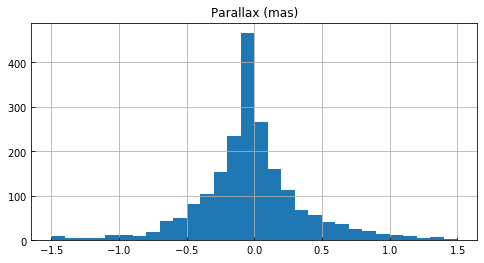

In [4]:
bins = np.arange(-1.5, 1.6, 0.1)

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(makarov_list["Par"], bins=bins)

ax.set_title("Parallax (mas)")
ax.grid()

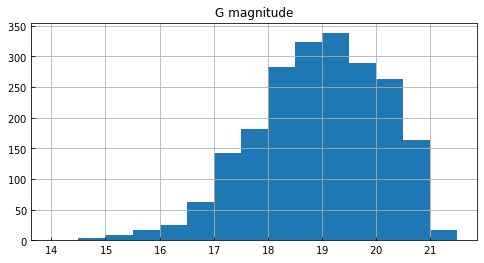

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

bins = np.arange(14, 22, 0.5)
ax.hist(makarov_list["Gmag"], bins=bins)

ax.set_title("G magnitude")
ax.grid()

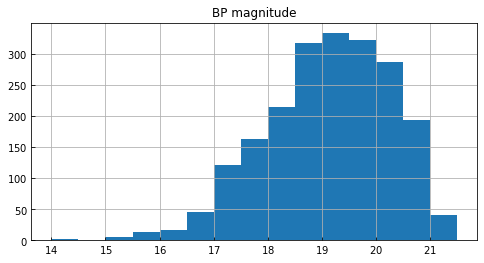

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))

bins = np.arange(14, 22, 0.5)
ax.hist(makarov_list["BPmag"], bins=bins)
ax.set_title("BP magnitude")
ax.grid()

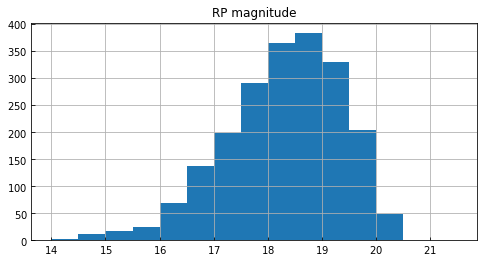

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))

bins = np.arange(14, 22, 0.5)
ax.hist(makarov_list["RPmag"], bins=bins)
ax.set_title("RP magnitude")
ax.grid()

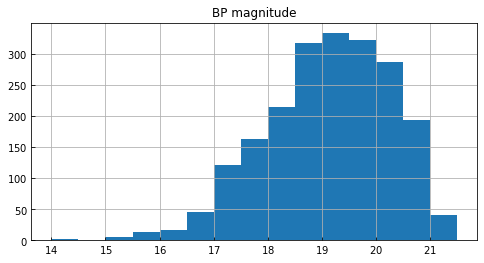

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

bins = np.arange(14, 22, 0.5)
ax.hist(makarov_list["BPmag"], bins=bins)
ax.set_title("BP magnitude")
ax.grid()

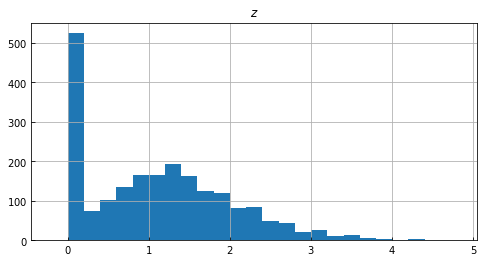

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))

# Fill the missing value
makarov_list["z"].fill_value = -99

bins = np.arange(-0.2, 5, 0.2)
ax.hist(makarov_list["z"], bins=bins)
ax.set_title("$z$")

ax.grid()

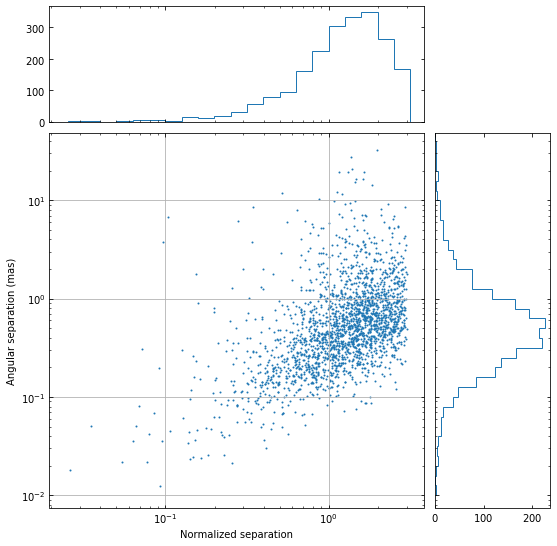

In [10]:
from matplotlib.ticker import NullFormatter

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)


# the scatter plot:
axScatter.scatter(makarov_list["u"], makarov_list["d"], s=1)

axScatter.set_xscale("log")
axScatter.set_yscale("log")

axScatter.set_xlabel("Normalized separation")
axScatter.set_ylabel("Angular separation (mas)")

axScatter.xaxis.set_ticks_position("both")
axScatter.yaxis.set_ticks_position("both")
axScatter.grid()

# now determine nice limits by hand:
binwidth = 0.1
xlim = np.log10(3.5)
ylim = np.log10(50)
binsx = 10**np.arange(-2, xlim+binwidth, binwidth)
binsy = 10**np.arange(-2, ylim+binwidth, binwidth)
axHistx.hist(makarov_list["u"], bins=binsx, histtype="step")
axHisty.hist(makarov_list["d"], bins=binsy, orientation="horizontal", histtype="step")

axHistx.set_xscale("log")
axHisty.set_yscale("log")

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.xaxis.set_ticks_position("both")
axHistx.yaxis.set_ticks_position("both")

axHisty.xaxis.set_ticks_position("both")
axHisty.yaxis.set_ticks_position("both")

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

In [11]:
# My progs
from my_progs.catalog.read_icrf import read_icrf3
from my_progs.catalog.read_gaia import read_dr2_iers

icrf3 = read_icrf3(wv="sx")
gdr2 = read_dr2_iers()

sou_type = Table(icrf3)
sou_type.keep_columns(["iers_name", "type"])

gdr2 = join(gdr2, sou_type, keys="iers_name")
gdr2_def = gdr2[gdr2["type"] == "D"]

In [12]:
makarov_list.rename_column("IERS", "iers_name")

def_in = join(makarov_list, gdr2_def, keys="iers_name")
def_out = setdiff(gdr2_def, def_in, keys="iers_name")

In [13]:
def_out

iers_name,source_id,ra,ra_err,dec,dec_err,pos_err,parallax,parallax_err,pmra,pmra_err,pmdec,pmdec_err,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,type
,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag,
str8,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str1
0007+106,2753828099849995776,2.6291913864114305,0.07220077482853457,10.974862370062839,0.06707566002756404,0.0875928007083494,0.018340715809109804,0.08860360711177596,0.07580367036677091,0.18396191345882698,-0.09401610870812523,0.1295897760761274,0.57687277,-0.1823899,0.18857054,-0.47303343,-0.3376961,-0.09783556,-0.7220726,-0.3267124,0.20573594,0.17586473,15.943655,16.163437,15.158809,D
0010+405,383084664461521536,3.379709059533647,0.30642273194190933,40.86031817758646,0.18262136689914535,0.308104947689734,0.015450318433697707,0.35624755363875243,0.7872298627334215,0.5711080651114665,-0.2178478450070414,0.2812835079111348,-0.14257787,0.3022634,-0.31667477,0.19280086,-0.09837172,0.18864177,-0.4105155,-0.2648572,0.19643839,-0.21485445,19.07663,19.004562,17.54357,D
0013-005,2545226894107313280,4.04620223886711,0.5199497615091785,-0.2534567177719667,0.40458852429884573,0.5693752180307423,-0.2668020919110768,0.5850124781518719,0.7958618246788018,1.2942813415451033,0.4021532440687492,0.9046718137399743,0.44188738,0.2626055,0.031097455,-0.2671943,0.13440219,-0.21924527,-0.4057419,0.058564566,-0.038882617,0.3014373,19.783754,20.087801,19.018677,D
0048-097,2474026167520609920,12.672155702098902,0.05607637159737537,-9.4847806429764,0.03594301366599088,0.060966655583093485,-0.015841901044899857,0.05998895519623778,0.1764866076906182,0.15682039467855582,-0.10779979138967034,0.07252347780726834,0.58452654,-0.010917738,-0.56999177,-0.42329627,0.18976153,-0.22876438,-0.7195117,0.26367632,0.0062121744,0.41308475,15.674981,15.971851,15.103343,D
0059+581,425704857595637120,15.69067652984654,0.06647621487484708,58.403093471149816,0.08185006783397367,0.08192083507984739,0.12325958716473026,0.07236202070715,-0.009215854083997027,0.09923557086447589,0.09935135809357562,0.11634571791933733,-0.029953698,0.2199167,-0.8160332,0.08147321,-0.100071006,0.04378567,-0.8450812,-0.2533449,0.27159894,-0.2854394,17.476574,17.935247,16.34789,D
0110+495,403495100669336960,18.362528188712986,0.15016444654638442,49.806678795730335,0.1616303944764456,0.17498085106582534,-0.2105757562813857,0.2758483992986013,0.3480605878031795,0.49165282126976134,0.4272306655683169,0.3848157264441315,0.24810207,-0.24877954,-0.8912394,-0.1879862,-0.521501,-0.25774857,-0.6847136,0.23159741,0.568876,0.15174623,18.219717,18.679543,17.312082,D
0149+218,98517757972814592,28.075246023075298,0.19253294004744265,22.118805641631376,0.16338466435716503,0.19398984998006036,-0.0877423936948296,0.22593489141218828,0.4742140031182799,0.4354582866086673,0.09818294710679462,0.3848219186934591,-0.078894526,0.19363733,-0.014729879,-0.054525957,-0.4954598,-0.03352216,-0.039155792,-0.03589321,0.09337182,0.3013495,18.425518,18.819672,17.621584,D
0234-301,5067305323237642112,39.12987264709139,0.08804235740103582,-29.898761180638445,0.12300427021267588,0.12304038799726863,0.04625247481467978,0.17644960840228477,-0.36150651574267767,0.2557028888490236,-0.05504936748899562,0.38201979264719055,-0.023659406,0.09885691,-0.357438,0.33579886,0.0048703337,0.22598656,0.106185906,-0.2891316,0.32843047,-0.28291142,18.41588,18.465664,17.979738,D


Among 250 sources in the ICRF3 defining list, 76 sources are considered unsuitable for frame tie.

Next, I will create a text file containing the source list of the whole 2119 sources.

In [14]:
from write_sou_src import write_nnr_list

# Write source list into a text file
nnrlist = "../logs/makarov2019.nnr_list"
print("Output file:", nnrlist)
lsthead = "*-- {} sources from Gaia DR2 provided in Makarov et al. 2019".format(len(makarov_list))
write_nnr_list(makarov_list["iers_name"], lsthead, nnrlist)

Output file: ../logs/makarov2019.nnr_list
